## Random Forest 보충

### max_feature 조정

- n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택의 무작위성이 사라지고 RF의 효율을 감소시키는 경향이 있다
- max_features=1로 설정하면 특성을 고르지 않고 무작위로 선택한 특성의 임계값을 찾는다

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

In [13]:
cancer = datasets.load_breast_cancer()

X=cancer.data
y=cancer.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.2, random_state=10)

In [17]:
# max_features = 1
forest = RandomForestClassifier(n_estimators=15, random_state=15, max_features = 1)

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 1.000
test accuracy 0.974


In [19]:
# max_features = 30
forest = RandomForestClassifier(n_estimators=15, random_state=15, max_features = len(cancer.feature_names)) #30

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 1.000
test accuracy 0.974


In [20]:
# max_features = 'auto' : default(sqrt(30))
forest = RandomForestClassifier(n_estimators=15, random_state=15, max_features = 'auto')

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 0.998
test accuracy 0.991


In [22]:
# max_depth = 5
forest = RandomForestClassifier(n_estimators=15, random_state=15, max_features = 'auto', max_depth = 5)

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 0.989
test accuracy 0.956


### min_samples_leaf 조정

- default는 1 : leaf node가 1개가 될 때까지(끝까지) 진행

In [43]:
# min_samples_leaf = 5
forest = RandomForestClassifier(n_estimators=15, random_state=15, 
                                                  max_features = 'auto', max_depth = None,
                                                  min_samples_leaf=5) # leaf가 5개가 되면 더 이상 진행 X

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 0.978
test accuracy 0.947


---

## 1. Linear Regression

### 1.1 simple linear

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
# 1. diabetes dataset loading

diab = datasets.load_diabetes()

In [33]:
# 2. 데이터 확인

print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [38]:
# 3. feature 선택

diab_X = diab.data[:,np.newaxis,3] #bp
diab_X.shape

(442, 1)

In [39]:
diab_X[0] # 데이터 추출 확인

array([0.02187235])

In [40]:
# 4. split data

diab_X_train = diab_X[:-20]
diab_X_test = diab_X[-20:] # 뒤의 20행을 테스트용으로 자름

diab_y_train = diab.target[:-20]
diab_y_test = diab.target[-20:]

In [50]:
# 5. 모델 객체 생성 및 fitting

lr = LinearRegression()
lr.fit(diab_X_train, diab_y_train)

LinearRegression()

In [51]:
# 6. prediction

diab_pred = lr.predict(diab_X_test)

In [54]:
# 7. 훈련 결과 확인

print('train set accuracy {:.3f}'.format(lr.score(diab_X_train, diab_y_train)))
print('test set accuracy {:.3f}'.format(lr.score(diab_X_test, diab_y_test)))

train set accuracy 0.192
test set accuracy 0.160


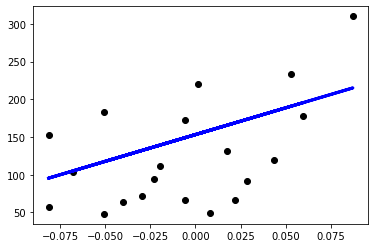

In [55]:
# 8. 그래프

plt.scatter(diab_X_test, diab_y_test, color='black')
plt.plot(diab_X_test, diab_pred, color='blue', linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

### 1.2 multiple linear

In [60]:
# 1. 데이터 분할

X = diab.data
y = diab.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.1, random_state=0)

In [61]:
# 2. object for modeling

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
# 3. 훈련 결과 확인

print('train set accuracy {:.3f}'.format(lr.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lr.score(X_test, y_test)))

train set accuracy 0.530
test set accuracy 0.357


In [63]:
# 4. 예측 결과

diab_pred = lr.predict(X_test)

### 1.3 Ridge

- 일반 LinearRegression은 parameter가 없기 때문에 모델의 복잡도를 제어할 방법이 없음
- 릿지 회귀에서의 가중치 선택은 train data에 대한 것 뿐만아니라 추가 제약조건을 만족시키는 방향으로 진행
- 방법: 가중치의 절댓값을 가능한 작게 만듦 → 모든 feature의 가중치를 0에 가깝게 만들어서 기울기를 최대한 작게 만듦 → 규제
- Regularization: 모델이 과대적합되지 않도록 강제로 제한 → L2 규제
- parameter 조정: alpha(default:1)값을 높이면 계수를 보다 0에 가깝게 만듦 → 규제를 강하게 함

In [64]:
from sklearn.linear_model import Ridge

In [66]:
# 1. 데이터 분할

X = diab.data
y = diab.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.1, random_state=0)

In [70]:
# 2. object for modeling

rdg = Ridge()
rdg.fit(X_train, y_train)


# 3. 훈련 결과 확인

print('train set accuracy {:.3f}'.format(rdg.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg.score(X_test, y_test)))

train set accuracy 0.457
test set accuracy 0.311


In [74]:
# parameter tuning

rdg0p1 = Ridge(alpha=0.1)
rdg0p1.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(rdg0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg0p1.score(X_test, y_test)))

train set accuracy 0.526
test set accuracy 0.349


In [72]:
rdg0p01 = Ridge(alpha=0.01)
rdg0p01.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(rdg0p01.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg0p01.score(X_test, y_test)))

train set accuracy 0.529
test set accuracy 0.350


In [73]:
rdg10 = Ridge(alpha=10)
rdg10.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(rdg10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg10.score(X_test, y_test)))

train set accuracy 0.185
test set accuracy 0.106


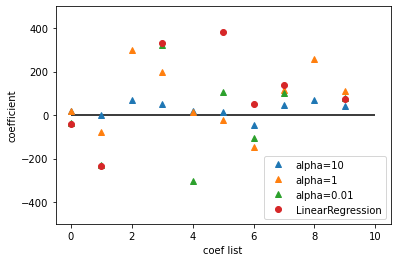

In [79]:
# Graph
plt.plot(rdg10.coef_,"^", label='alpha=10')
plt.plot(rdg.coef_,"^", label='alpha=1')
plt.plot(rdg0p01.coef_,"^", label='alpha=0.01')
plt.plot(lr.coef_,"o", label='LinearRegression')
plt.xlabel("coef list")
plt.ylabel('coefficient')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-500,500)
plt.legend()
plt.show()

### 1.4 Lasso
- Ridge의 대안
- Ridge와 마찬가지로 모든 계수를 0에 가깝게 만드나, 규제 방식에 차이가 있음(L1 규제)
- 어떤 계숫값은 0으로 산출(완전 제외)

In [83]:
from sklearn.linear_model import Lasso

In [80]:
# 1. 데이터 분할

X = diab.data
y = diab.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.1, random_state=0)

In [94]:
# 2. modeling

lss = Lasso()
lss.fit(X_train, y_train)


# 3. 훈련 결과 확인

print('train set accuracy {:.3f}'.format(lss.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss.coef_!=0)))

train set accuracy 0.378
test set accuracy 0.231
사용한 특성의 수: 3


In [97]:
# parameter tuning

lss0p1 = Lasso(alpha=0.1)
lss0p1.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss0p1.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss0p1.coef_!=0)))

train set accuracy 0.522
test set accuracy 0.341
사용한 특성의 수: 7


In [98]:
# parameter tuning

lss0p01 = Lasso(alpha=0.01)
lss0p01.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss0p01.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss0p01.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss0p01.coef_!=0)))

train set accuracy 0.529
test set accuracy 0.348
사용한 특성의 수: 10


In [96]:
lss10 = Lasso(alpha=10)
lss10.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss10.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss10.coef_!=0)))

train set accuracy 0.000
test set accuracy -0.038
사용한 특성의 수: 0


---

### 2.1 Logistic Regression
- parameter C(cost func.)를 조정해 과대적합 혹은 과소적합 문제를 해결
- C 값이 크면(높은 코스트) 훈련을 더 복잡하게 → 약한 규제
- C 값이 작으면(낮은 코스트) 훈련을 덜 복잡하게 → 강한 규제

In [104]:
from sklearn.linear_model import LogisticRegression

In [217]:
# 1. 데이터 불러오기

iris_dataset = datasets.load_iris()

In [218]:
# 2. 데이터 분할 - 이항분류

X = iris_dataset.data[50:,:]
y = iris_dataset.target[50:]

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=58)

X_train.shape

(70, 4)

In [219]:
# 3. modeling

logreg = LogisticRegression().fit(X_train, y_train)
logreg


# 4. 훈련 결과 확인

print('train set accuracy {:.3f}'.format(logreg.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg.score(X_test, y_test)))

train set accuracy 0.957
test set accuracy 0.933


In [220]:
# parameter tuning

logreg0p1 = LogisticRegression(C=0.1).fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(logreg0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg0p1.score(X_test, y_test)))

train set accuracy 0.929
test set accuracy 0.900


In [221]:
logreg10 = LogisticRegression(C=10).fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(logreg10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg10.score(X_test, y_test)))

train set accuracy 0.986
test set accuracy 0.900


In [222]:
logreg.coef_

array([[-0.10421167, -0.26898011,  2.61548484,  2.18239913]])

In [223]:
logreg10.coef_

array([[-1.14195626, -0.72613352,  4.66638315,  5.60247286]])

In [224]:
logreg.intercept_ # bias

array([-15.09550173])

In [225]:
logreg.predict_proba(X_test) # model에 값을 넣었을 때 0 / 1이 나올 확률

array([[0.99559989, 0.00440011],
       [0.06710962, 0.93289038],
       [0.84487952, 0.15512048],
       [0.98850777, 0.01149223],
       [0.03723777, 0.96276223],
       [0.94747609, 0.05252391],
       [0.49037746, 0.50962254],
       [0.11718322, 0.88281678],
       [0.01088702, 0.98911298],
       [0.77227341, 0.22772659],
       [0.52209591, 0.47790409],
       [0.96505667, 0.03494333],
       [0.01532233, 0.98467767],
       [0.11476608, 0.88523392],
       [0.68972391, 0.31027609],
       [0.9815621 , 0.0184379 ],
       [0.50302814, 0.49697186],
       [0.25537322, 0.74462678],
       [0.97125956, 0.02874044],
       [0.03849744, 0.96150256],
       [0.80887967, 0.19112033],
       [0.05143334, 0.94856666],
       [0.72063213, 0.27936787],
       [0.88736123, 0.11263877],
       [0.47317781, 0.52682219],
       [0.09462779, 0.90537221],
       [0.58297815, 0.41702185],
       [0.97703402, 0.02296598],
       [0.99567148, 0.00432852],
       [0.02254181, 0.97745819]])

### 연습 2

In [226]:
i = 0
A = logreg.coef_[0]
b = logreg.intercept_[0]
TG = X_test
pred_p = []

for i in range(len(TG)):
    temp = 1/(1+np.exp(A[0]*TG[i][0]+A[1]*TG[i][1]+A[2]*TG[i][2]+A[3]*TG[i][3]+b))
    pred_p.append([temp,1-temp])

pred_p

[[0.9955998868685761, 0.004400113131423855],
 [0.06710961722565846, 0.9328903827743416],
 [0.8448795164607187, 0.15512048353928132],
 [0.9885077673311233, 0.011492232668876667],
 [0.03723776596192729, 0.9627622340380727],
 [0.9474760928260879, 0.05252390717391209],
 [0.49037745522895765, 0.5096225447710423],
 [0.11718322354091505, 0.882816776459085],
 [0.01088702021428424, 0.9891129797857158],
 [0.7722734096930635, 0.22772659030693654],
 [0.5220959080785775, 0.47790409192142247],
 [0.9650566746384793, 0.03494332536152067],
 [0.015322332589081524, 0.9846776674109184],
 [0.11476607548285939, 0.8852339245171406],
 [0.6897239069108034, 0.31027609308919657],
 [0.9815620957014212, 0.018437904298578833],
 [0.503028136175619, 0.49697186382438097],
 [0.2553732200807535, 0.7446267799192465],
 [0.9712595643325309, 0.02874043566746909],
 [0.038497441988298166, 0.9615025580117018],
 [0.8088796651166267, 0.19112033488337332],
 [0.051433343007383635, 0.9485666569926163],
 [0.7206321310595097, 0.27936

In [228]:
temp = logreg.predict_proba(X_test)
np.unique([round(pred_p[n][1],4)==round(temp[n][1],4) for n in range(len(temp))])

array([ True])

---

### 연습 1

In [141]:
boston = datasets.load_boston()

In [143]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [198]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.1, random_state=0)

In [199]:
# 1. multiple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("coef:",lr.coef_)
print('train set accuracy {:.3f}'.format(lr.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lr.score(X_test, y_test)))

coef: [-1.14644795e-01  3.62004052e-02  6.53873262e-03  2.19924733e+00
 -1.59109961e+01  4.26798929e+00 -1.01602089e-02 -1.34698690e+00
  2.71154731e-01 -1.16326045e-02 -1.01714981e+00  9.81293722e-03
 -4.43797298e-01]
train set accuracy 0.763
test set accuracy 0.515


In [200]:
# 2. Ridge

rdg = Ridge()
rdg.fit(X_train, y_train)

print("coef:",lr.coef_)
print('train set accuracy {:.3f}'.format(rdg.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg.score(X_test, y_test)))

coef: [-1.14644795e-01  3.62004052e-02  6.53873262e-03  2.19924733e+00
 -1.59109961e+01  4.26798929e+00 -1.01602089e-02 -1.34698690e+00
  2.71154731e-01 -1.16326045e-02 -1.01714981e+00  9.81293722e-03
 -4.43797298e-01]
train set accuracy 0.761
test set accuracy 0.503


In [201]:
rdg0p1 = Ridge(alpha=0.1)
rdg0p1.fit(X_train, y_train)

print("coef:",rdg0p1.coef_)
print('train set accuracy {:.3f}'.format(rdg0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg0p1.score(X_test, y_test)))

coef: [-1.13968503e-01  3.63805363e-02  1.71898438e-03  2.19740031e+00
 -1.47592982e+01  4.27492271e+00 -1.12438344e-02 -1.33135631e+00
  2.67804364e-01 -1.17124633e-02 -1.00518255e+00  9.86392065e-03
 -4.44856974e-01]
train set accuracy 0.763
test set accuracy 0.513


In [202]:
rdg10 = Ridge(alpha=10)
rdg10.fit(X_train, y_train)

print("coef:",rdg10.coef_)
print('train set accuracy {:.3f}'.format(rdg10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(rdg10.score(X_test, y_test)))

coef: [-0.10742202  0.03980207 -0.05265756  1.66630567 -1.82316948  4.06229011
 -0.02093459 -1.16092237  0.24247336 -0.01315259 -0.88605744  0.01034261
 -0.47777859]
train set accuracy 0.756
test set accuracy 0.489


In [203]:
# 3. Lasso

lss = Lasso()
lss.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss.coef_!=0)))

train set accuracy 0.709
test set accuracy 0.492
사용한 특성의 수: 10


In [204]:
lss0p1 = Lasso(alpha=0.1)
lss0p1.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss0p1.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss0p1.coef_!=0)))

train set accuracy 0.752
test set accuracy 0.474
사용한 특성의 수: 12


In [205]:
lss10 = Lasso(alpha=10)
lss10.fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(lss10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(lss10.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss10.coef_!=0)))

train set accuracy 0.536
test set accuracy 0.332
사용한 특성의 수: 4


### 연습 3

In [229]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [243]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [245]:
X=cancer.data
y=cancer.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.2, random_state=10)

In [246]:
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(logreg.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg.score(X_test, y_test)))

train set accuracy 0.960
test set accuracy 0.956


In [250]:
logreg0p1 = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(logreg0p1.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg0p1.score(X_test, y_test)))

train set accuracy 0.956
test set accuracy 0.939


In [251]:
logreg10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)

print('train set accuracy {:.3f}'.format(logreg10.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(logreg10.score(X_test, y_test)))

train set accuracy 0.969
test set accuracy 0.939
